<a href="https://colab.research.google.com/github/rsastri21/MovieTracker/blob/main/434_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 4**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import random
from scipy.stats import cauchy

In [3]:
# Functions to assist with Task A
def create_config(size):
  '''
  Create the initial configuration of an L x L matrix with all values.
  L is specified with the size parameter.
  '''
  A = np.ones((size, size), dtype=int)
  return A

def flip_index(matrix):
  '''
  Finds a random (i, j) index to flip in the matrix configuration.
  Takes the matrix as a parameter and returns the modified matrix.
  '''
  L = np.shape(matrix)[0] # Finds the side length L
  
  # Find indices
  i = random.randint(0, L - 1)
  j = random.randint(0, L - 1)

  # Flip spin value
  matrix = matrix.copy()
  matrix[i, j] = -matrix[i, j]

  return matrix

def compute_hamiltonian(matrix):
  '''
  Computes the Hamiltonian from the provided formula for a given spin 
  configuration. Returns the scalar quantity.
  '''
  J = 1 # J chosen to be 1 in the lab handout.
  L = np.shape(matrix)[0]

  # Perform summation over matrix indices
  sum = 0
  for i in range(L):
    for j in range(L):
      s_ij = matrix[i, j]
      s_left = matrix[(i - 1) % L, j]
      s_right = matrix[(i + 1) % L, j]
      s_top = matrix[i, (j + 1) % L]
      s_bottom = matrix[i, (j - 1) % L]
      
      sum += s_ij * (s_right + s_left + s_top + s_bottom)
  
  # Multiply by constant factor
  sum = float(sum) * -J / 2.0

  return sum

def compute_energy_change(state1, state2):
  '''
  Given two spin states as matrices, computes the energy change
  between them and returns the quantity.
  '''
  E_state1 = compute_hamiltonian(state1)
  E_state2 = compute_hamiltonian(state2)

  return E_state2 - E_state1

def determine_next_state(delta_E, state1, state2, temp):
  '''
  If delta_E < 0, the move is accepted. Otherwise, the move is accepted
  if exp(-delta_E / T) > random uniform probability value. 
  '''
  random_value = uniform.rvs(size=1)
  T = temp # Specified in the lab handout

  probability = np.exp(-delta_E / T)

  # Condition for keeping original state
  if delta_E < 0:
    return state2
  elif probability > random_value:
    return state2
  else:
    # Condition not satisfied, old state kept.
    return state1

def execute_step(state, temp):
  '''
  Carry out one step in creating the next state.
  Return the state following one iteration.
  '''
  new_state = flip_index(state)
  delta_E = compute_energy_change(state, new_state)

  # Determine the next state and return it
  return determine_next_state(delta_E, state, new_state, temp)

def compute_magnetization(state):
  '''
  Computes the magnetization for a given spin configuration.
  '''
  total = state.sum()
  return total


Task A - Computing the Magnetization

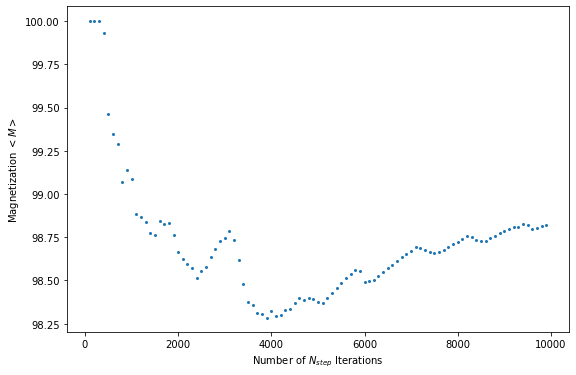

In [7]:
# Define maximum iterations
N_max = 10000

# Magnetization array to store computed values
n_array = []
magnetization = []

# Initial state
S = create_config(10)
mag = 0.

for i in range(1, N_max):
  new_S = execute_step(S, 1.5)
  S = new_S.copy()
  mag += compute_magnetization(S)
  if i % 100 == 0:
    n_array.append(i)
    magnetization.append(mag / i)

# Create plot
fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(n_array, magnetization, 'o', markersize=2)
ax.set_xlabel('Number of $N_{step}$ Iterations')
ax.set_ylabel('Magnetization $<M>$')

plt.show()

After several runs, 10,000 iterations in steps of 100 causes the magnitization to approach a value between 98.5 and 99.25. 

Task B

In [8]:
# Function to carry out a Monte Carlo simulation for <M>.

def compute_m(temp, N_max, L):
  '''
  Computes the magnetization from a Monte Carlo simulation for a spin lattice.
  Returns the magnetization value after N_max iterations.
  '''
  # Define maximum iterations
  N = N_max

  # Initial state
  S = create_config(L)
  mag = 0.

  for i in range(1, N_max):
    new_S = execute_step(S, temp)
    S = new_S.copy()
    mag += compute_magnetization(S)
    
  return mag / N_max


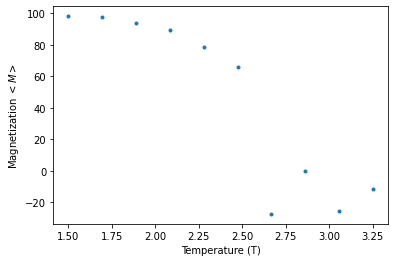

In [13]:
N_max = 10000
L = 10 # 10x10 lattice

# Define temperature interval
temps = np.linspace(1.5, 3.25, 10)

magnetization = []
# Compute MC simulation for each temperature
for temp in temps:
  magnetization.append(compute_m(temp, N_max, L))

# Create plot
fig, ax = plt.subplots()

ax.plot(temps, magnetization, 'o', markersize=3)
ax.set_xlabel("Temperature (T)")
ax.set_ylabel("Magnetization $<M>$")

plt.show()

There appears to be a phase transition after the temperature crosses $T_c=2.50$. This is seen in the apparent flip from magnitization near 100 to magnitization near 0. 

Two Body Decay of a Massive Particle

In [84]:
# Functions to assist with this portion of the lab.

def mass_distribution(mass, m_0, gamma):
  '''
  Computes the mass distribution for a given mass of a Higgs Boson particle.
  '''
  result = (1 / np.pi) * (gamma / 2.) / ((mass - m_0) ** 2 + (gamma / 2.) ** 2)

  return result

def generate_angles():
  '''
  Generates the angle theta and phi from a uniform spherical distribution.
  Returns a tuple that packs the angles together.
  '''
  theta = np.arccos(2 * random.uniform(0, 1) - 1) # From textbook derivation
  phi = random.uniform(0, 2 * np.pi)

  return (phi, theta)

def generate_photon_energy(m_0, gamma):
  '''
  Generates the mass of a Higgs Boson particle using rejetion sampling.
  Parameters are the mass of the Higgs particle and the associated gamma.
  Returns the photon energy from the relationship E_gamma = m_H / 2
  '''
  found_value = False
  mass = 0
  while not found_value:
    random_mass = random.uniform(m_0 - 5 * gamma, m_0 + 5 * gamma)
    y = uniform.rvs(size=1)
    weight = mass_distribution(random_mass, m_0, gamma)
    # Condition for accepting the mass
    if y < weight:
      # Break out of loop
      found_value = True
      mass = random_mass
  
  E_gamma = mass / 2.
  
  return E_gamma

def compute_opposite_angle(angles):
  '''
  Returns a tuple of the opposite angles from the input in spherical coordinates.
  '''
  new_angles = ((np.pi + angles[0]) % 2 * np.pi, (np.pi - angles[1]) % np.pi)
  return new_angles

def get_momentum(energy, angles):
  '''
  Makes use of the relation E = p for a photon.
  Accepts an input energy and set of angles of a photon and outputs a list
  of 3 quantities representing px, py, and pz. 
  '''
  p = []

  # x-component: px = p * sin(theta) * cos(phi)
  px = energy * np.sin(angles[1]) * np.cos(angles[0])
  p.append(px)

  # y-component: py = p * sin(theta) * sin(phi)
  py = energy * np.sin(angles[1]) * np.sin(angles[0])
  p.append(py)

  # z-component: pz = p * cos(theta)
  pz = energy * np.cos(angles[1])
  p.append(pz)

  return p

def simulate_event(m_0, gamma):
  '''
  Carries out a single event and returns the 4-momentum and the angle of the decay photons.
  Takes in the parameters of the Higgs Boson as parameters.
  '''
  # Begin by generating the angle of the first photon.
  angle1 = generate_angles()
  
  # Assign angles of second photon.
  angle2 = compute_opposite_angle(angle1)

  # Generate Higgs mass and photon energy
  photon_energy = generate_photon_energy(m_0, gamma)

  # Compute 4-momentum
  p1 = get_momentum(photon_energy, angle1)
  photon1 = [photon_energy, p1[0], p1[1], p1[2]]

  p2 = get_momentum(photon_energy, angle2)
  photon2 = [photon_energy, p2[0], p2[1], p2[2]]

  return photon1, angle1, photon2, angle2


Task A

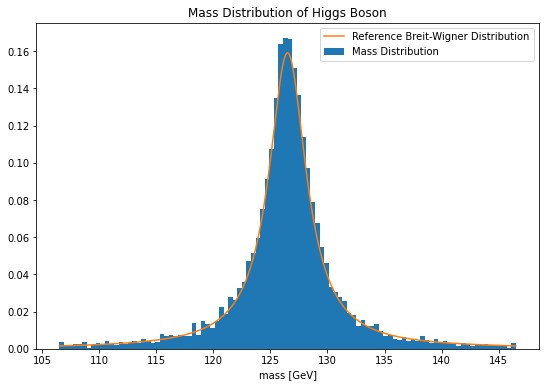

In [43]:
# Constants
m_0 = 126.5 
gamma = 4

# Generate 10000 various masses symmetric around 
N = 10000
mass = []
distribution = []

# Rejection sampling until N samples are obtained
while (len(mass) < N):
  random_mass = random.uniform(m_0 - 5 * gamma, m_0 + 5 * gamma)
  y = uniform.rvs(size=1)
  weight = mass_distribution(random_mass, m_0, gamma)
  if y < weight:
    mass.append(random_mass)
    distribution.append(y)

# Reference Distribution
x = np.linspace(m_0 - 5 * gamma, m_0 + 5 * gamma, 1000)
dist = mass_distribution(x, m_0, gamma)

# Create plot
fig, ax = plt.subplots(figsize=(9, 6))
bin_list = np.linspace(m_0 - 5 * gamma, m_0 + 5 * gamma, 101)
ax.hist(mass, histtype='stepfilled', density=True, bins=bin_list, label="Mass Distribution")
ax.plot(x, dist, label=r'Reference Breit-Wigner Distribution')

ax.set_xlabel("mass [GeV]")
ax.set_title("Mass Distribution of Higgs Boson")

plt.legend()

plt.show()

Task B - Energy and Angular Distributions for Photon 1

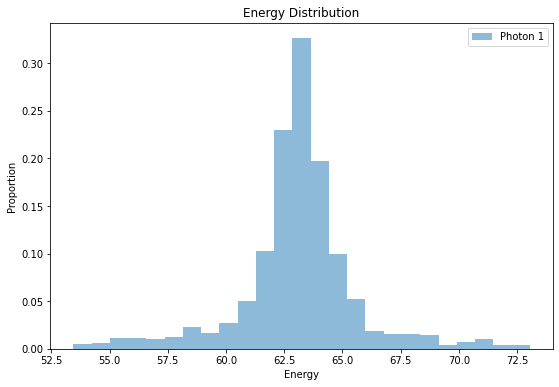

In [85]:
# Run N simulated events 
N_events = 1000
m_0 = 126.5
gamma = 4

angular_dist1 = np.empty((1000, 2))
angular_dist2 = np.empty((1000, 2))

momenta1 = np.empty((1000, 4))
momenta2 = np.empty((1000, 4))

for i in range(N_events):
  photon1, angle1, photon2, angle2 = simulate_event(m_0, gamma)
  momenta1[i] = photon1
  momenta2[i] = photon2
  angular_dist1[i] = angle1
  angular_dist2[i] = angle2

# Plot energy distribution
fig, ax = plt.subplots(figsize=(9, 6))
ax.hist(momenta1[:, 0], histtype='stepfilled', bins=25, density=True, label="Photon 1", alpha=0.5)

ax.set_xlabel("Energy")
ax.set_ylabel("Proportion")
ax.set_title("Energy Distribution")

plt.legend()
plt.show()

The plot resembles the expected Breit-Wigner distribution but centered around $\frac{m_0}{2}$ as the photon has half the energy of the Higgs Boson.

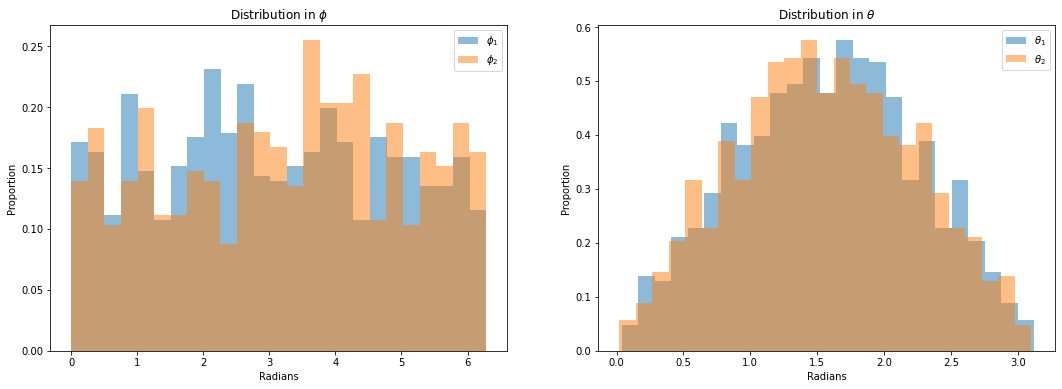

In [86]:
# Angular Distributions

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].hist(angular_dist1[:, 0], bins=25, histtype='stepfilled', density=True, label=r"$\phi_1$", alpha=0.5)
ax[0].hist(angular_dist2[:, 0], bins=25, histtype='stepfilled', density=True, label=r"$\phi_2$", alpha=0.5)

ax[0].set_xlabel("Radians")
ax[0].set_ylabel("Proportion")
ax[0].set_title("Distribution in $\phi$")

ax[1].hist(angular_dist1[:, 1], bins=25, histtype='stepfilled', density=True, label=r"$\theta_1$", alpha=0.5)
ax[1].hist(angular_dist2[:, 1], bins=25, histtype='stepfilled', density=True, label=r"$\theta_2$", alpha=0.5)

ax[1].set_xlabel("Radians")
ax[1].set_ylabel("Proportion")
ax[1].set_title(r"Distribution in $\theta$")

ax[0].legend()
ax[1].legend()
plt.show()

The angular distributions for both photons also look as expected. With a uniform spherical distribution, the $\phi$ coordinate will look flat, while the $\theta$ coordinate will concentrate near the middle as there is more spherical surface area near the equatorial regions of a sphere. As a uniform set of points are generated, both photon 1 and photon 2 will exhibit similar angular distributions due to the symmetric nature of the generation of $(\phi, \theta)$.